In [1]:
%load_ext rich

In [2]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
ox.config(use_cache=True,
          useful_tags_way = ox.settings.useful_tags_way + ['bicycle','cycleway',"cycle lane","bike path"])

In [4]:
def bike_network(city: str) -> nx.Graph:
    G = ox.graph_from_place(
        city, network_type="all", simplify=False, which_result=1)
    non_cycleways = [(u, v, k) for u, v, k, d in G.edges(keys=True, data=True)
                     if not ('cycleway' in d or "bicyle" in d or "cycle lane" in d or "bike path" in d or d['highway'] == 'cycleway')]
    G.remove_edges_from(non_cycleways)
    G = ox.simplify_graph(G)
    G = ox.utils_graph.remove_isolated_nodes(G)
    return ox.project_graph(G)

In [5]:
city = "Amsterdam, The Netherlands"
G_bike = bike_network(city)
bike_components = len([c for c in nx.connected_components(nx.to_undirected(G_bike))])
print(f"The city of {city}, has {bike_components} different 🚲 bicycle components")

/Users/natera/miniconda3/envs/ox/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


The city of Amsterdam, The Netherlands, has 282 different 🚲 bicycle components


In [6]:
G_drive = ox.graph_from_place(
        city, network_type="drive", simplify=True, which_result=1)
G_drive = ox.utils_graph.remove_isolated_nodes(G_drive)
G_drive = ox.project_graph(G_drive)
drive_components = len([c for c in nx.connected_components(nx.to_undirected(G_drive))])
print(f"The city of {city}, has {drive_components} different 🚙 drivable components")

/Users/natera/miniconda3/envs/ox/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


The city of Amsterdam, The Netherlands, has 1 different 🚙 drivable components


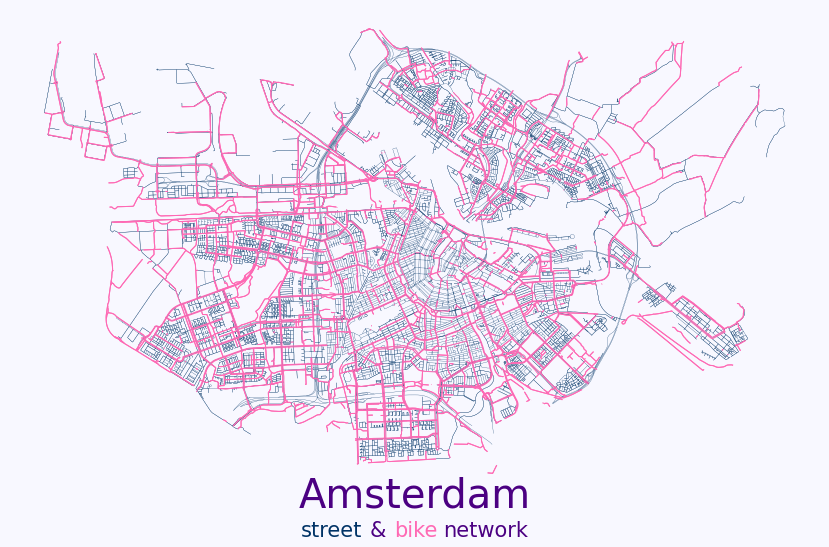

In [7]:
bike_edges = ox.graph_to_gdfs(G_bike, nodes=False)
drive_edges = ox.graph_to_gdfs(G_drive, nodes=False)

fig, ax = plt.subplots(1,1,figsize=(16,9), facecolor="#F8F8FF")
ax.set_facecolor("#F8F8FF")
drive_edges.plot(ax=ax, linewidth=0.25, color="#003366", zorder=0, alpha=1)
bike_edges.plot(ax=ax, linewidth=1, color="#FF69B4", zorder=1)

title = ax.text(0.5, 0.0, "Amsterdam", transform=ax.transAxes, fontsize=40, color="#4B0082", ha="center", va="center")
subtitle1 = ax.text(0.36, -0.07, "street", transform=ax.transAxes, fontsize=21, color="#003366", ha="left", va="center")
subtitle2 = ax.text(0.445, -0.07, "&", transform=ax.transAxes, fontsize=21, color="#4B0082", ha="left", va="center")
subtitle3 = ax.text(0.475, -0.07, "bike", transform=ax.transAxes, fontsize=21, color="#FF69B4", ha="left", va="center")
subtitle4 = ax.text(0.535, -0.07, "network", transform=ax.transAxes, fontsize=21, color="#4B0082", ha="left", va="center")

ax.axis("off");
plt.savefig("../assets/img/2023-02-02-amsterdam-drive-bike-network.png")